In [40]:
import numpy as np
import matplotlib.pyplot as plt
#https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BF%D1%80%D0%BE%D0%B3%D0%BE%D0%BD%D0%BA%D0%B8

In [41]:
class Equation:
    def __init__(self) -> None:
        # y"+p(x)y'+q(x)y=f(x)
        # c*y(a) = ct
        # d*y(b) = dt
        self.c = 1
        self.ct = 0.
        self.d = 1
        self.dt = 0.
        self.p = lambda x: 0.
        self.q = lambda x: 0.
        self.f = lambda x: np.cos(x)
        self.a = -3*np.pi / 2
        self.b = 3*np.pi / 2
        self.exact_solve = lambda x: - np.cos(x) + x * (np.cos(self.a)-np.cos(self.b)+self.ct-self.dt)/(self.a-self.b) + (self.a*(self.dt+np.cos(self.b))-self.b*(self.ct+np.cos(self.a)))/(self.a-self.b)

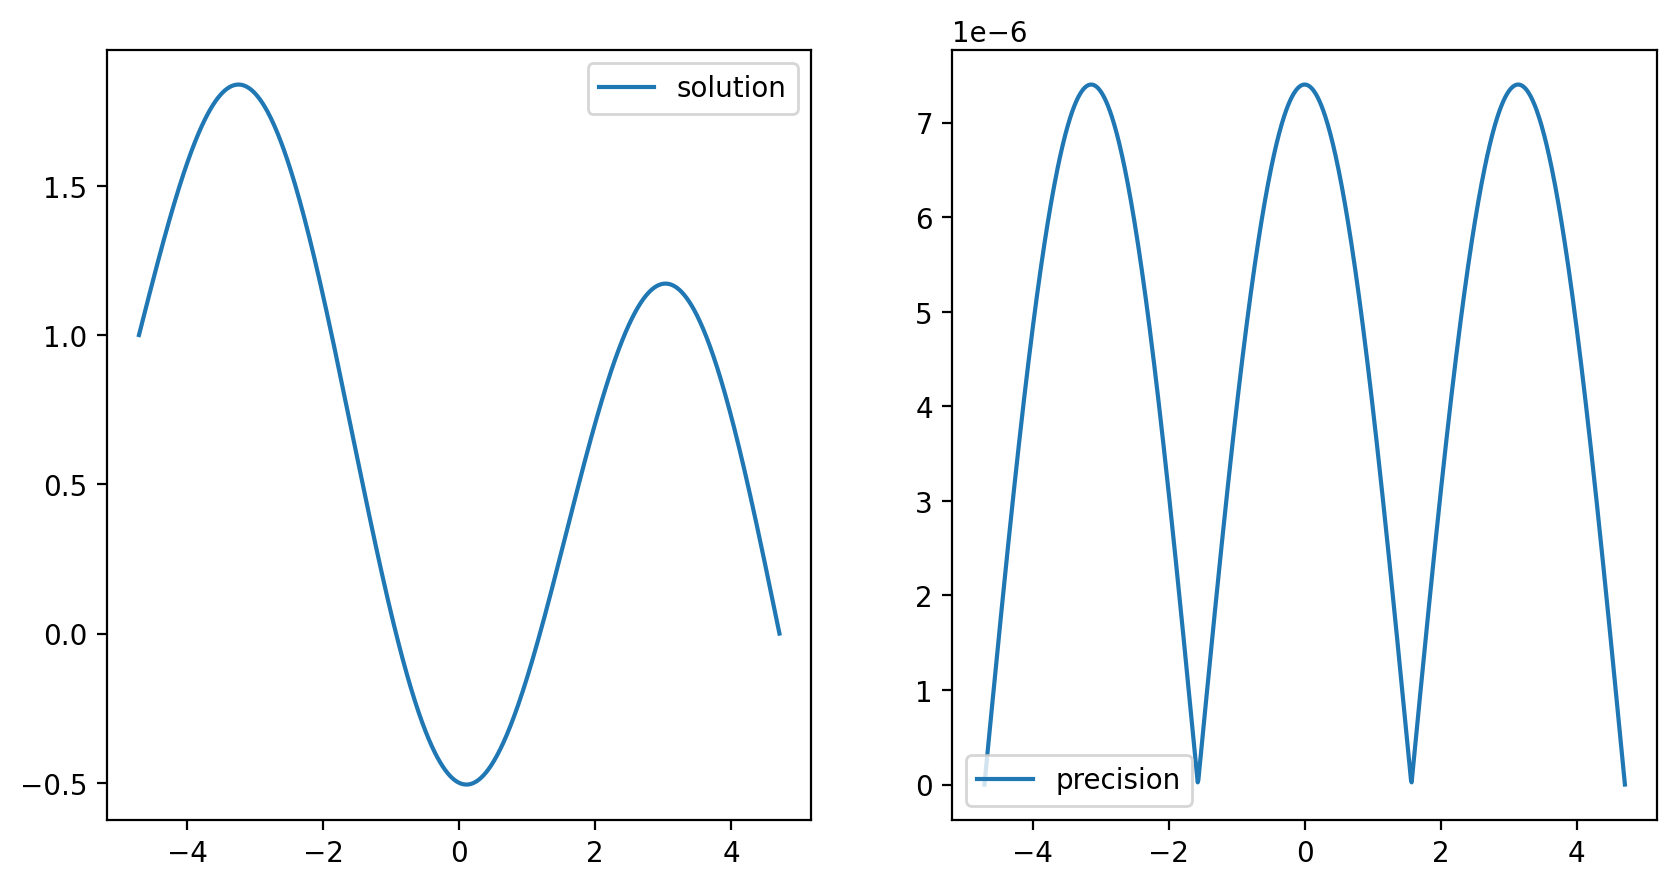

In [42]:
def alpha(equation, x_i, h):
    return 1.0 / (h ** 2) - equation.p(x_i) / (2.0 * h)


def beta(equation, x_i, h):
    return -2.0 / (h ** 2) + equation.q(x_i)


def gamma(equation, x_i, h):
    return 1.0 / (h ** 2) + equation.p(x_i) / (2.0 * h)


def delta(equation, x_i):
    return equation.f(x_i)


def sweep_method(equation, n: int):
    h = (equation.b - equation.a) / n
    epsilon = list()
    theta = list()
    epsilon.append(0)
    theta.append(equation.ct / equation.c)
    for i in range(1, n):
        x_i = equation.a + i * h
        cur_epsilon = epsilon[len(epsilon) - 1]
        cur_theta = theta[len(theta) - 1]
        epsilon.append(-gamma(equation, x_i, h) / (beta(equation, x_i, h) + alpha(equation, x_i, h) * cur_epsilon))
        theta.append((delta(equation, x_i) - cur_theta * alpha(equation, x_i, h)) / (
                beta(equation, x_i, h) + alpha(equation, x_i, h) * cur_epsilon))

    y_n = equation.dt/equation.d
    result = np.zeros(int(n) + 1)
    output = list()
    result[n] = y_n
    output.append((equation.a + n * h, y_n))
    for i in range(n, 0, -1):
        result[i - 1] = result[i] * epsilon[i - 1] + theta[i - 1]
        x_i = equation.a + (i - 1) * h
        output.append((x_i, result[i - 1]))
    return output


def solve_equation(n=1000, ct=0, dt=0, a=-3*np.pi / 2, b=3*np.pi / 2):
    equation = Equation()
    equation.a = a
    equation.b = b
    equation.ct = ct
    equation.dt = dt
    result = sweep_method(equation, n)
    x_dimension = list()
    y_dimension = list()
    error_list = list()
    for i in range(len(result)):
        x_dimension.append(result[i][0])
        y_dimension.append(result[i][1])
        error_list.append(np.abs(result[i][1] - equation.exact_solve(result[i][0])))
    fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=200)
    ax[0].plot(x_dimension, y_dimension, label="solution")
    ax[0].legend()
    ax[1].plot(x_dimension, error_list, label="precision")
    ax[1].legend()


solve_equation(1000, 1, 0)